In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
seed = 0
planet_max_size = 25
rng = np.random.RandomState(seed)

(array([0.1775    , 0.01458333, 0.01291667, 0.00458333, 0.00333333,
        0.00666667, 0.00375   , 0.01333333, 0.0125    , 0.1675    ]),
 array([ 1. ,  3.4,  5.8,  8.2, 10.6, 13. , 15.4, 17.8, 20.2, 22.6, 25. ]),
 <BarContainer object of 10 artists>)

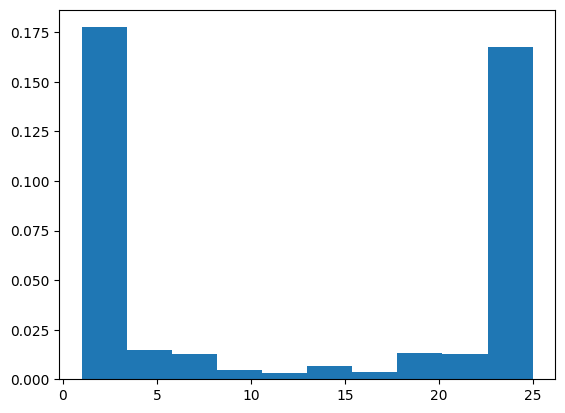

In [4]:
# beta distribution plot - Jovian world size
a = b = 0.1
samples = 1000
beta = rng.beta(
    a,
    b,
    samples
)
beta = MinMaxScaler(feature_range=(1, planet_max_size)).fit_transform(
    beta.reshape(-1, 1)
)

# convert to int
beta = beta.astype(int)

plt.hist(beta, density=True)

(array([0.39      , 0.01125   , 0.01      , 0.00208333, 0.00125   ,
        0.00125   , 0.        , 0.00041667, 0.        , 0.00041667]),
 array([ 1. ,  3.4,  5.8,  8.2, 10.6, 13. , 15.4, 17.8, 20.2, 22.6, 25. ]),
 <BarContainer object of 10 artists>)

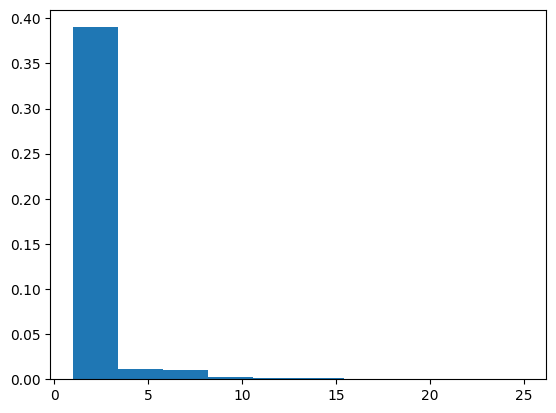

In [5]:
# gamma distribution plot - icy worlds size
target_mean = 2.5
k = .1
theta = target_mean / k
samples = 1000
gamma = rng.gamma(
    k,
    theta,
    samples
)
# rescale to between 1 and 25 (just shift and scale)
gamma = MinMaxScaler(feature_range=(1, planet_max_size)).fit_transform(
    gamma.reshape(-1, 1)
)

# convert to int
gamma = gamma.astype(int)

plt.hist(gamma, density=True)

(array([0.00618056, 0.01923611, 0.03493056, 0.00743056, 0.00236111,
        0.02395833, 0.08888889, 0.18472222, 0.04166667, 0.00729167]),
 array([ 1. ,  3.4,  5.8,  8.2, 10.6, 13. , 15.4, 17.8, 20.2, 22.6, 25. ]),
 <BarContainer object of 10 artists>)

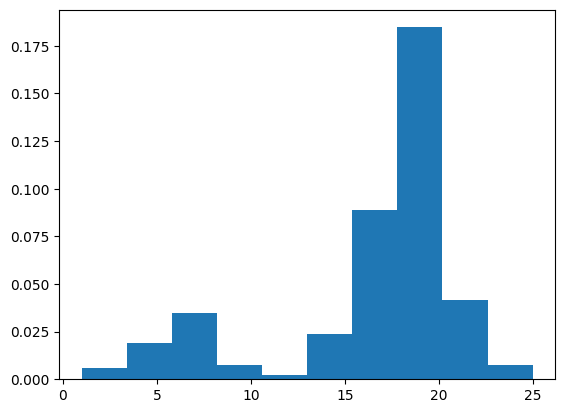

In [8]:
# sol like world size - two gaussians combined
mu1 = 1
seperation = 3
sigma = .5
repeats = 5
mu2 = mu1 + seperation
samples = 1000
gauss1 = rng.normal(
    mu1,
    sigma,
    samples
)
gauss2 = rng.normal(
    mu2,
    sigma,
    samples
)
gauss = np.concatenate((gauss1, np.repeat(gauss2, 5)))

# rescale to between 1 and 25 (just shift and scale)
gauss = MinMaxScaler(feature_range=(1, planet_max_size)).fit_transform(
    gauss.reshape(-1, 1)
)

# convert to int
gauss = gauss.astype(int)

plt.hist(gauss, density=True)

The slope is [0.03] and the intercept is -7.105427357601002e-15
33.333333333333336


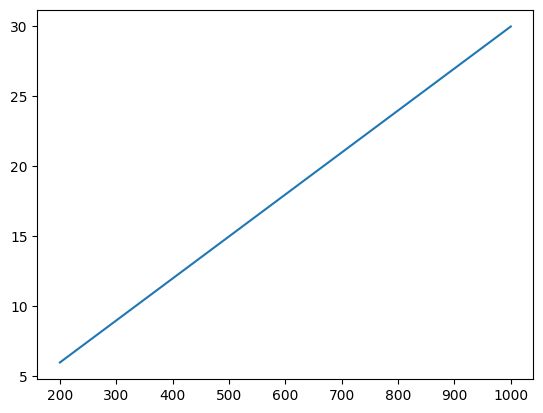

In [7]:
x = [200, 400, 600, 800, 1000]
y = [6, 12, 18, 24, 30]

# lin reg
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(np.array(x).reshape(-1, 1), y)
print(f"The slope is {reg.coef_} and the intercept is {reg.intercept_}")

print(800 / 24)

plt.plot(x, y)